# Part 2: Resampling and confidence intervall

In [63]:
import numpy as np
import algorithms
from model_selection0 import GridSearchNew #use Gridsearch.fit(x,y)
from model_comparison0 import model_comparison0
from model_resample import model_resample
from utils import generateDesignmatrix, franke_function, ci, plotCI, clean_reg_coeff
from scipy import stats
import scipy.stats as st
import matplotlib.pyplot as plt
from imageio import imread
%matplotlib notebook 
# creates the toolbars with zoom buttons on plots.

## Franke function 

In [64]:
np.random.seed(1000)
x = np.random.rand(1000, )
y = np.random.rand(1000, )
z = franke_function(x, y)
p = 5 
X = generateDesignmatrix(p,x,y)

In [65]:
# Experimental setup
models = {
    'ridge': algorithms.Ridge, 
    "ols": algorithms.OLS, 
    "lasso": algorithms.Lasso
}

lmd = {
    'ridge': [0.1], 
    'ols': [0], 
    'lasso': [0.1]
}
nboots = 100

In [66]:
mse_avg_test, r2_avg_test, reg_coeffs, bias_model_test, mv_test, mse_avg_train, r2_avg_train,  bias_model_train,  mv_train = model_resample(models, lmd, X, z, nboots, split_size = 0.2)

<IPython.core.display.Javascript object>


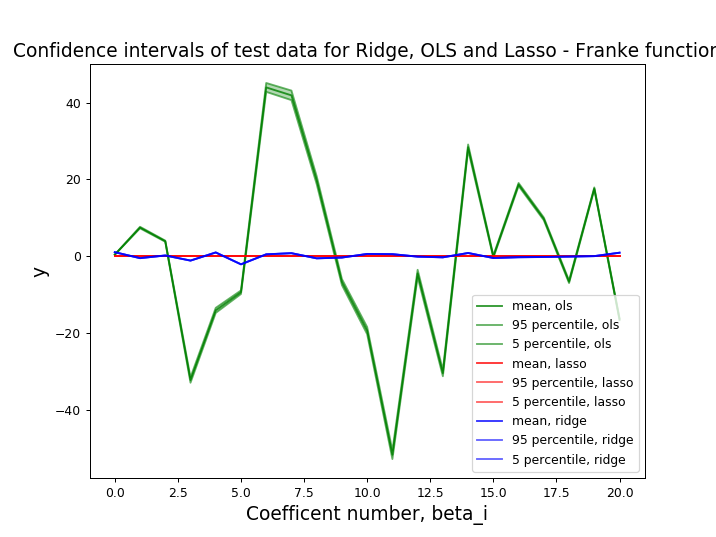

In [68]:
a,b,c, d, e, f, g, h, i = clean_reg_coeff(X, reg_coeffs, nboots)
plotCI(X, a,b,c, d, e, f, g, h, i)
plt.title("Confidence intervals of test data for Ridge, OLS and Lasso - Franke function", fontsize = 15)
plt.savefig("Confidenceintervall_Franke.png")
plt.show()

In [69]:
mse_avg_test, mse_avg_train
# train has a lower value than test. OK!

({'lasso': 0.08040878495870299,
  'ols': 0.002110305230473447,
  'ridge': 0.007925398488526055},
 {'lasso': 0.07951721729816348,
  'ols': 0.0019494817814442197,
  'ridge': 0.007885896389767534})

In [70]:
r2_avg_test, r2_avg_train 
# train is higher than test. OK!

({'lasso': -0.006096596080705932,
  'ols': 0.9735257962502257,
  'ridge': 0.9008086295473694},
 {'lasso': 0.0, 'ols': 0.9754320977442545, 'ridge': 0.9007532298719612})

In [71]:
bias_model_test, bias_model_train

({'lasso': 0.0018046232222748704,
  'ols': 0.0005438751102903039,
  'ridge': 0.0006775412788659896},
 {'lasso': 0.0018046232222748704,
  'ols': 0.0018046232243396076,
  'ridge': 0.0019339269294877948})

In [72]:
mv_test, mv_train

({'lasso': 2.220446049250313e-16,
  'ols': 9.769962616701378e-16,
  'ridge': -3.641531520770513e-16},
 {'lasso': 8.881784197001252e-16,
  'ols': -3.3661962106634747e-15,
  'ridge': 2.842170943040401e-16})

## Real data: Flekkefjord 

In [89]:
# Experimental setup
models = {
    'ridge': algorithms.Ridge, 
    "ols": algorithms.OLS, 
    "lasso": algorithms.Lasso
}

lmd = {
    'ridge': [0.1], 
    'ols': [0], 
    'lasso': [0.1]
}
nboots = 100

In [90]:
terrain_F = imread("Flekkefjord.tif")

lengthx = 100
lengthy = 100
x = np.linspace(1, lengthx, num=lengthx)
y = np.linspace(1+80, lengthy+80, num=lengthy)

#x = np.arange(lengthx)
#y = np.arange(lengthy)

x = np.squeeze(np.tile(x, [1,100]))
y = np.squeeze(np.tile(y, [1,100]))
z = np.ndarray.flatten(terrain_F)
p = 3 
X = generateDesignmatrix(p, x, y)
print(X.shape)

(10000, 10)


In [91]:
mse_avg_test, r2_avg_test, reg_coeffs, bias_model_test, mv_test, mse_avg_train, r2_avg_train,  bias_model_train,  mv_train   = model_resample(
    models, lmd, X, z, nboots, split_size = 0.2)

/home/hanna/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [92]:
a,b,c, d, e, f, g, h, i = clean_reg_coeff(X, reg_coeffs, nboots)

<IPython.core.display.Javascript object>


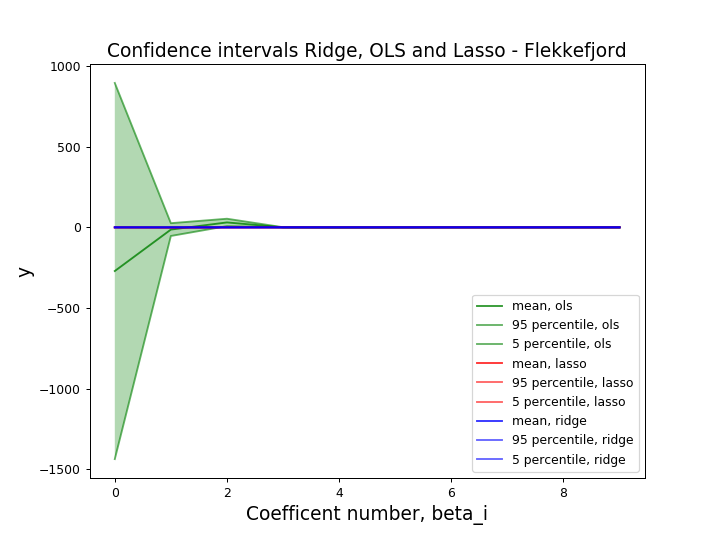

In [93]:
%matplotlib notebook
plotCI(X, a,b,c, d, e, f, g, h, i)
plt.title("Confidence intervals Ridge, OLS and Lasso - Flekkefjord", fontsize = 15)
plt.savefig("Confidenceintervall_F.png")
plt.show()

In [78]:
mse_avg_test, mse_avg_train

({'lasso': 139548.2834882672,
  'ols': 7083065129.224261,
  'ridge': 139563.22325173896},
 {'lasso': 139001.45338688846,
  'ols': 7148865618.31662,
  'ridge': 139029.43767069207})

In [79]:
r2_avg_test, r2_avg_train

({'lasso': 0.003302374319542234,
  'ols': -50497.810220014646,
  'ridge': 0.003195578361188873},
 {'lasso': 0.003995010084554798,
  'ols': -51403.994162583,
  'ridge': 0.0037944175153468017})

In [80]:
bias_model_test, bias_model_train

({'lasso': 273.21720282327544,
  'ols': 4345.6127194025385,
  'ridge': 273.0594717538237},
 {'lasso': 273.2615442730778,
  'ols': 4385.886832426483,
  'ridge': 273.1184740954915})

In [81]:
# model variance
mv_test, mv_train

({'lasso': -4.644107320928015e-12,
  'ols': 1.6055855667218565e-09,
  'ridge': -4.7248249757103625e-12},
 {'lasso': -4.902403816231527e-11,
  'ols': 4.569010343402624e-09,
  'ridge': 3.0767068892600946e-11})

## Real data: Montevideo

In [83]:
terrain_M = imread("Montevideo.tif")

x = np.linspace(1, lengthx, num=lengthx)
y = np.linspace(1+80, lengthy+80, num=lengthy)

#x = np.arange(lengthx)
#y = np.arange(lengthy)

x = np.squeeze(np.tile(x, [1,100]))
y = np.squeeze(np.tile(y, [1,100]))
z = np.ndarray.flatten(terrain_F)
p = 3
X = generateDesignmatrix(p, x, y)
z = np.ndarray.flatten(terrain_M)

#mse_M, r2_M, reg_coeffs_M, bias_M, model_variance_M

mse_avg_test, r2_avg_test, reg_coeffs, bias_model_test, mv_test, mse_avg_train, r2_avg_train,  bias_model_train,  mv_train   = model_resample(
    models, lmd, X, z, nboots, split_size = 0.2)

/home/hanna/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


<IPython.core.display.Javascript object>


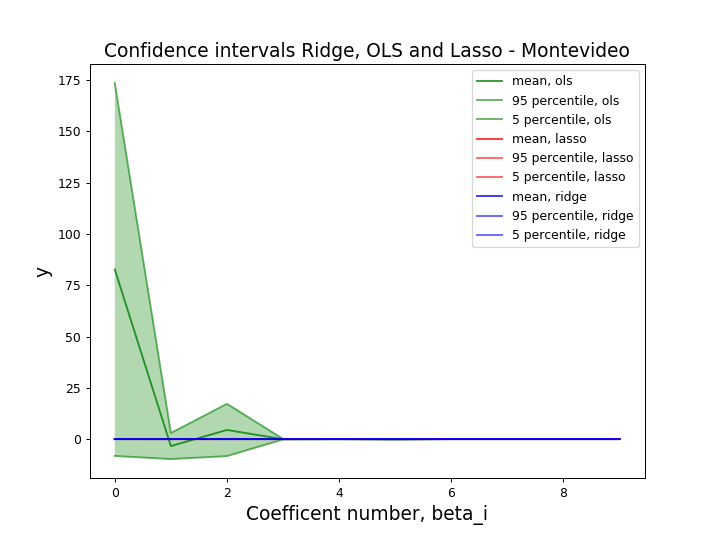

In [84]:
a,b,c, d, e, f, g, h, i = clean_reg_coeff(X, reg_coeffs, nboots)
"""
a - mean ridge 
b - ci high 
c - ci lox

2. ols
3. lasso
"""


%matplotlib notebook
plotCI(X, a,b,c, d, e, f, g, h, i)
plt.title("Confidence intervals Ridge, OLS and Lasso - Montevideo", fontsize = 15)
plt.savefig("Confidenceintervall_M.png")
plt.show()

In [85]:
mse_avg_test, mse_avg_train

({'lasso': 476.3746135189901,
  'ols': 241832939.66578683,
  'ridge': 477.33386107787953},
 {'lasso': 474.2891937798208,
  'ols': 239155444.3972597,
  'ridge': 475.1241674893577})

In [86]:
r2_avg_test, r2_avg_train

({'lasso': -0.00021138101681897003,
  'ols': -504155.2398003659,
  'ridge': -0.002225746433563791},
 {'lasso': 0.000898460241528255,
  'ols': -507164.73262399784,
  'ridge': -0.0008612475630009964})

In [87]:
bias_model_test, bias_model_train

({'lasso': 60.308053301565124,
  'ols': 1164.491974053014,
  'ridge': 60.390109851077455},
 {'lasso': 60.30839499509369,
  'ols': 1175.5829222478983,
  'ridge': 60.38984712378553})

In [88]:
mv_test, mv_train

({'lasso': -1.3500311979441903e-14,
  'ols': 5.27652446180582e-10,
  'ridge': 4.39399627794046e-13},
 {'lasso': -8.553513453080086e-13,
  'ols': -3.277091309428215e-10,
  'ridge': 6.6529537434689704e-12})